In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Now that we've loaded in the packages, we can get the 2020 NFL play-by-play data

In [92]:
YEAR = 2020
data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(YEAR) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

Let's pick a game to make sure it's working

In [93]:
game_df = data[(data.game_id== '2020_01_ARI_SF')]
game_df.sample(3)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
168,4201,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,0.298,NaN,NaN,NaN,NaN,NaN,0.729,-72.921
10,274,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,ARI,away,SF,...,0,1,0.940,0.403,3.260,1.0,0.999,0.580,0.598,40.218
125,3121,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,-1.730,2.354,7.097,5.0,0.716,0.716,0.897,10.347


In [96]:
avg_length = data.groupby(by=['game_id'])['epa'].count().mean()

def calc_gei(game_id):
    game = data[(data['game_id']==game_id)]
    length = len(game)
  #Adjusting for game length
    normalize = avg_length / length
  #Get win probability differences for each play
    win_prob_change = game['home_wp'].diff().abs()
  #Normalization
    gei = normalize * win_prob_change.sum()
    return gei

In [97]:
print(f"Cardinals @ 49ers GEI: {calc_gei('2020_01_ARI_SF')}")

Cardinals @ 49ers GEI: 5.793167969834032


In [98]:
print(f"Bucs @ Chiefs GEI: {calc_gei('2020_21_KC_TB')}")

Bucs @ Chiefs GEI: 1.9759571838237149


In [99]:
all_games = list(data['game_id'].unique())
games_dict = {}
for game in all_games:
    games_dict[game] = calc_gei(str(game))
sorted_dict = dict(sorted(games_dict.items(), key=lambda item: item[1], reverse = True))
win_prob_df = pd.DataFrame(list(sorted_dict.items()),columns = ['game_id','wp_ex']) 
win_prob_df

,game_id,wp_ex
0,2020_03_CIN_PHI,8.264
1,2020_15_LAC_LV,8.138
2,2020_08_NO_CHI,6.549
3,2020_07_DET_ATL,6.262
4,2020_13_LV_NYJ,6.245
...,...,...
264,2020_06_NYJ_MIA,1.284
265,2020_14_HOU_CHI,1.255
266,2020_18_CLE_PIT,1.236
267,2020_16_TB_DET,1.183


In [101]:
epa_df = pd.DataFrame(data.groupby(["game_id"])["epa"].mean())
epa_df = epa_df.sort_values(by=['epa'], ascending=False)
epa_df

,epa
game_id,
2020_15_DET_TEN,0.264
2020_01_GB_MIN,0.245
2020_17_LAC_KC,0.239
2020_09_NE_NYJ,0.235
2020_07_CLE_CIN,0.232
...,...
2020_06_NYJ_MIA,-0.234
2020_13_NE_LAC,-0.254
2020_14_WAS_SF,-0.272


In [102]:
final_df = pd.merge(win_prob_df, epa_df, on='game_id').round(4)
final_df["wp_ex"] = (10/final_df["wp_ex"].max()) * final_df["wp_ex"]
final_df["epa"] = (5/final_df["epa"].max()) * final_df["epa"]
final_df['excitement'] = final_df['epa'] + final_df['wp_ex']
final_df_sorted = final_df.sort_values(by = ['excitement'], ascending = False)
final_df_sorted

,game_id,wp_ex,epa,excitement
6,2020_07_CLE_CIN,7.497,4.396,11.893
1,2020_15_LAC_LV,9.848,1.948,11.796
20,2020_17_TEN_HOU,6.787,3.905,10.692
34,2020_11_KC_LV,6.381,4.007,10.388
36,2020_06_HOU_TEN,6.239,4.062,10.302
...,...,...,...,...
257,2020_05_CIN_BAL,1.997,-3.856,-1.858
254,2020_14_NE_LA,2.065,-4.354,-2.289
202,2020_08_LA_MIA,3.116,-5.428,-2.312
264,2020_06_NYJ_MIA,1.553,-4.439,-2.886


In [103]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.131, 0.137, 'By Tej Seth | @mfbanalytcs | @mnpykings')

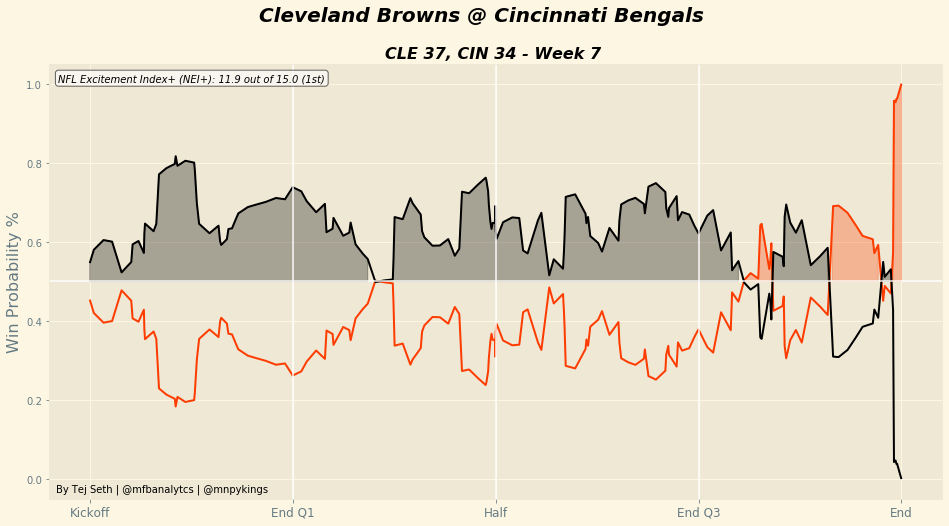

In [104]:
cols = ['home_wp', 'away_wp', 'game_seconds_remaining']
game_df_1 = data[(data.game_id== '2020_07_CLE_CIN')]
game_df_1 = game_df[cols].dropna()
plt.style.use('_classic_test_patch')
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot('game_seconds_remaining', 'away_wp', 
             data=game_df_1, color='#FF3C00',linewidth=2)
sns.lineplot('game_seconds_remaining', 'home_wp', 
             data=game_df_1, color='#000000',linewidth=2)
#AxesSubplot:xlabel='game_seconds_remaining', ylabel='home_wp'
ax.fill_between(game_df['game_seconds_remaining'], 0.5, game_df['away_wp'], 
                where=game_df['away_wp']>.5, color = '#FF3C00',alpha=0.3)

ax.fill_between(game_df['game_seconds_remaining'], 0.5, game_df['home_wp'], 
                where=game_df['home_wp']>.5, color = '#000000',alpha=0.3)
plt.ylabel('Win Probability %', fontsize=16)
plt.xlabel('', fontsize=16)
plt.axvline(x=900, color='white', alpha=0.7)
plt.axvline(x=1800, color='white', alpha=0.7)
plt.axvline(x=2700, color='white', alpha=0.7)
plt.axhline(y=.50, color='white', alpha=0.7)

#Format and rename xticks
ax.set_xticks(np.arange(0, 3601,900))
plt.gca().invert_xaxis()
x_ticks_labels = ['End','End Q3','Half','End Q1','Kickoff']
ax.set_xticklabels(x_ticks_labels, fontsize=12)

plt.suptitle('Cleveland Browns @ Cincinnati Bengals', 
             fontsize=20, style='italic',weight='bold')

plt.title('CLE 37, CIN 34 - Week 7 ', fontsize=16, 
          style='italic', weight='semibold')

props = dict(boxstyle='round', facecolor='white', alpha=0.6)
plt.figtext(.133,.85,'NFL Excitement Index+ (NEI+): 11.9 out of 15.0 (1st)',style='italic',bbox=props)

plt.figtext(0.131,0.137,'By Tej Seth | @mfbanalytcs | @mnpykings')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.131, 0.137, 'By Tej Seth | @mfbanalytcs | @mnpykings')

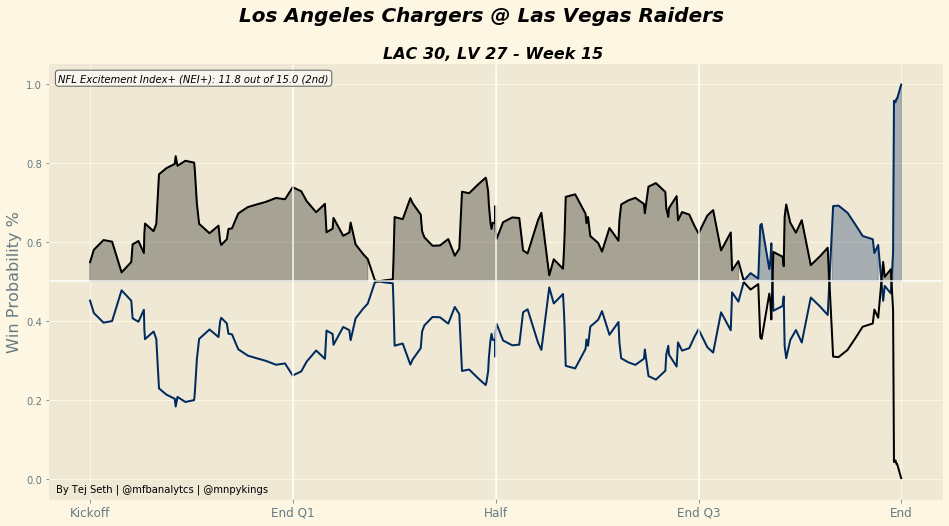

In [105]:
game_df_2 = data[(data.game_id== '2020_15_LAC_LV')]
game_df_2 = game_df[cols].dropna()
plt.style.use('_classic_test_patch')
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot('game_seconds_remaining', 'away_wp', 
             data=game_df_1, color='#002A5E',linewidth=2)
sns.lineplot('game_seconds_remaining', 'home_wp', 
             data=game_df_1, color='#000000',linewidth=2)
#AxesSubplot:xlabel='game_seconds_remaining', ylabel='home_wp'
ax.fill_between(game_df['game_seconds_remaining'], 0.5, game_df['away_wp'], 
                where=game_df['away_wp']>.5, color = '#002A5E',alpha=0.3)

ax.fill_between(game_df['game_seconds_remaining'], 0.5, game_df['home_wp'], 
                where=game_df['home_wp']>.5, color = '#000000',alpha=0.3)
plt.ylabel('Win Probability %', fontsize=16)
plt.xlabel('', fontsize=16)
plt.axvline(x=900, color='white', alpha=0.7)
plt.axvline(x=1800, color='white', alpha=0.7)
plt.axvline(x=2700, color='white', alpha=0.7)
plt.axhline(y=.50, color='white', alpha=0.7)

#Format and rename xticks
ax.set_xticks(np.arange(0, 3601,900))
plt.gca().invert_xaxis()
x_ticks_labels = ['End','End Q3','Half','End Q1','Kickoff']
ax.set_xticklabels(x_ticks_labels, fontsize=12)

plt.suptitle('Los Angeles Chargers @ Las Vegas Raiders', 
             fontsize=20, style='italic',weight='bold')

plt.title('LAC 30, LV 27 - Week 15 ', fontsize=16, 
          style='italic', weight='semibold')

props = dict(boxstyle='round', facecolor='white', alpha=0.6)
plt.figtext(.133,.85,'NFL Excitement Index+ (NEI+): 11.8 out of 15.0 (2nd)',style='italic',bbox=props)

plt.figtext(0.131,0.137,'By Tej Seth | @mfbanalytcs | @mnpykings')

Hope you enjoyed! Thank you to Max Bolger (@mnpykings) for the tutorial (https://www.opensourcefootball.com/posts/2020-08-21-game-excitement-and-win-probability-in-the-nfl/) and feel free to reach out to me @mfbanalytics if you need any help